<a href="https://colab.research.google.com/github/richie-omondi/Cyclistic-Case-Study/blob/main/Cyclistic_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Scenario

You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director
of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore,
your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights,
your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives
must approve your recommendations, so they must be backed up with compelling data insights and professional data
visualizations

## About The Company

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that
are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and
returned to any other station in the system anytime.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments.

One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes,
and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers
who purchase annual memberships are Cyclistic members.

Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the
pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will
be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a
very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic
program and have chosen Cyclistic for their mobility needs.

Moreno has set a clear goal: **Design marketing strategies aimed at converting casual riders into annual members**. In order to
do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why
casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are
interested in analyzing the Cyclistic historical bike trip data to identify trends

## Key Stakeholders

● **Lily Moreno**: The director of marketing and your manager. Moreno is responsible for the development of campaigns
and initiatives to promote the bike-share program. These may include email, social media, and other channels.

● **Cyclistic marketing analytics team**: A team of data analysts who are responsible for collecting, analyzing, and
reporting data that helps guide Cyclistic marketing strategy.

● **Cyclistic executive team**: The notoriously detail-oriented executive team will decide whether to approve the
recommended marketing program


## The Datasets

The datasets used are Cyclistic’s historical trip data to analyze and identify trends. 

**Note**: The datasets have a different name because Cyclistic is a fictional company. For the purposes of this case study, the datasets are appropriate and will enable you to answer the business questions. The data has been made available by Motivate International Inc. under this [license](https://ride.divvybikes.com/data-license-agreement)
This is public data that you can use to explore how different customer types are using Cyclistic bikes. Link to the datasets is [here](https://divvy-tripdata.s3.amazonaws.com/index.html)

I downloaded data between April 2021 - Aril 2022

Once downloaded and unzipped you should have a total of 12 CSV files. Nothing needs to be done from here onwards on any spreadsheet software since we will be using 'R' programming language to handle the datasets. We'll be using 'R' because the dataset is simply too large and puts a lot of strain on spreadsheet softwares like Excel and Google Sheets

We need to make sure we can run R code in this notebook

In [1]:
%load_ext rpy2.ipython

Let's load the data

In [5]:
%%R

Apr_2021 <- read.csv("/content/drive/MyDrive/202104-divvy-tripdata.csv")
May_2021 <- read.csv("/content/drive/MyDrive/202105-divvy-tripdata.csv")
Jun_2021 <- read.csv("/content/drive/MyDrive/202106-divvy-tripdata.csv")
Jul_2021 <- read.csv("/content/drive/MyDrive/202107-divvy-tripdata.csv")
Aug_2021 <- read.csv("/content/drive/MyDrive/202108-divvy-tripdata.csv")
Sep_2021 <- read.csv("/content/drive/MyDrive/202109-divvy-tripdata.csv")
Oct_2021 <- read.csv("/content/drive/MyDrive/202110-divvy-tripdata.csv")
Nov_2021 <- read.csv("/content/drive/MyDrive/202111-divvy-tripdata.csv")
Dec_2021 <- read.csv("/content/drive/MyDrive/202112-divvy-tripdata.csv")
Jan_2022 <- read.csv("/content/drive/MyDrive/202201-divvy-tripdata.csv")
Feb_2022 <- read.csv("/content/drive/MyDrive/202202-divvy-tripdata.csv")
Mar_2022 <- read.csv("/content/drive/MyDrive/202203-divvy-tripdata.csv")
Apr_2022 <- read.csv("/content/drive/MyDrive/202204-divvy-tripdata.csv")


Install the necessary packages

In [7]:
%%R

library(tidyverse)
library(lubridate)
library(ggplot2)

Check for consistency across column names

In [8]:
%%R

colnames(Apr_2021)
colnames(May_2021)
colnames(Jun_2021)
colnames(Jul_2021)
colnames(Aug_2021)
colnames(Sep_2021)
colnames(Oct_2021)
colnames(Nov_2021)
colnames(Dec_2021)
colnames(Jan_2022)
colnames(Feb_2022)
colnames(Mar_2022)
colnames(Apr_2022)

 [1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"     


Looks like we have consistent column names

Analyze each dataset with the `str` function to see if all columns have the same vector formatting.

In [9]:
%%R

str(Apr_2021)
str(May_2021)
str(Jun_2021)
str(Jul_2021)
str(Aug_2021)
str(Sep_2021)
str(Oct_2021)
str(Nov_2021)
str(Dec_2021)
str(Jan_2022)
str(Feb_2022)
str(Mar_2022)
str(Apr_2022)

'data.frame':	337230 obs. of  13 variables:
 $ ride_id           : chr  "6C992BD37A98A63F" "1E0145613A209000" "E498E15508A80BAD" "1887262AD101C604" ...
 $ rideable_type     : chr  "classic_bike" "docked_bike" "docked_bike" "classic_bike" ...
 $ started_at        : chr  "2021-04-12 18:25:36" "2021-04-27 17:27:11" "2021-04-03 12:42:45" "2021-04-17 09:17:42" ...
 $ ended_at          : chr  "2021-04-12 18:56:55" "2021-04-27 18:31:29" "2021-04-07 11:40:24" "2021-04-17 09:42:48" ...
 $ start_station_name: chr  "State St & Pearson St" "Dorchester Ave & 49th St" "Loomis Blvd & 84th St" "Honore St & Division St" ...
 $ start_station_id  : chr  "TA1307000061" "KA1503000069" "20121" "TA1305000034" ...
 $ end_station_name  : chr  "Southport Ave & Waveland Ave" "Dorchester Ave & 49th St" "Loomis Blvd & 84th St" "Southport Ave & Waveland Ave" ...
 $ end_station_id    : chr  "13235" "KA1503000069" "20121" "13235" ...
 $ start_lat         : num  41.9 41.8 41.7 41.9 41.7 ...
 $ start_lng         : num 

Looks like we have complete and consistent vector formatting across the datasets. Let's combine all the CSV files into one dataframe

In [10]:
%%R

all_trips <- bind_rows(Apr_2021, May_2021, Jun_2021, Jul_2021, Aug_2021, Sep_2021, Oct_2021, Nov_2021, Dec_2021, Jan_2022, Feb_2022, Mar_2022, Apr_2022)

**There are a few other problems we need to fix:**

In the "member_casual" column, there are two names for members ("member and "subscriber") and two names for casual riders ("Customer" and "casual"). We will need to consolidate that from 4 to 2 labels

In [11]:
%%R

unique(all_trips$member_casual)
table(all_trips$member_casual)

# In the "member_casual" column, replace "Subscriber" with "member" and "Customer" with "casual"
all_trips <- all_trips %>% 
  mutate(member_casual = recode(member_casual, 
                                "Subscriber" = "member",
                                "Customer" = "casual"))
# Lets recheck
unique(all_trips$member_casual)
table(all_trips$member_casual)


 casual  member 
2672959 3421822 


The data as of right now can only be aggregated at the ride-level, which is too granular. We need to be able to zoom out and see additional data by adding additional columns of data -- such as day, month, year -- that provide additional opportunities to aggregate data.

In [13]:
%%R

all_trips$date <- as.Date(all_trips$started_at)

#Adding year, month, day and day of week column 

all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$month <- format(as.Date(all_trips$date), "%B")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$day_of_week <- format(as.Date(all_trips$date), "%A")

We will want to add a calculated field for length of ride since the datasets did not have the "tripduration" column. We will add "ride_length" to the entire dataframe for consistency.

In [14]:
%%R
all_trips$ride_length <- difftime(all_trips$ended_at, all_trips$started_at, 
                                  units = c("secs"))

There are some rides where "tripduration" shows up as negative, including several hundred rides where Divvy took bikes out of circulation for quality control reasons. We will want to delete these rides.

In [24]:
%%R
summary(all_trips)
sum(all_trips$ride_length < 0) # shows 145 "ride_length" values less than 0


[1] 145


These need to be removed from the dataframe and a new dataframe created

In [26]:
%%R
all_trips_v2 <- all_trips[!(all_trips$ride_length < 0),]

So far so good! We have removed the `ride_length` values that don't make sense and cleaned the dataset

Before starting the analysis lets put the `days_of_week` and `months` in order.

In [27]:
%%R

# Order the 'day_of_week' & 'month' properly 
all_trips_v2$day_of_week <- ordered(all_trips_v2$day_of_week, 
                            levels = c("Sunday", "Monday", "Tuesday",
                                        "Wednesday", "Thursday", "Friday",
                                        "Saturday"))

all_trips_v2$month <- ordered(all_trips_v2$month, 
                              levels = c("January", "February", "March", "April", 
                                         "May","June", "July", "August", 
                                         "September", "October","November", 
                                         "December"))

Let's analyze bike riding behaviour of Casual riders and Members throughout the week over the course of a year. The table below shows the average ride length of causal riders vs members in seconds. The casual riders ride the bikes for nearly **2.5** times longer than our members!

In [28]:
%%R
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + 
          all_trips_v2$day_of_week, FUN = mean) 
          # shows table ordered from Sunday through Saturday as the last 
          # day of the week

   all_trips_v2$member_casual all_trips_v2$day_of_week all_trips_v2$ride_length
1                      casual                   Sunday           2234.1083 secs
2                      member                   Sunday            909.8759 secs
3                      casual                   Monday           1883.3526 secs
4                      member                   Monday            768.8166 secs
5                      casual                  Tuesday           1642.7588 secs
6                      member                  Tuesday            743.5858 secs
7                      casual                Wednesday           1652.3812 secs
8                      member                Wednesday            747.8730 secs
9                      casual                 Thursday           1666.3465 secs
10                     member                 Thursday            748.9650 secs
11                     casual                   Friday           1795.6795 secs
12                     member           

In [34]:
%%R
2300 / 60

[1] 38.33333


Let's compare bike-riding behavior between Casual riders and Members on a monthly basis

In [30]:
%%R
# Let's save this as a dataframe "monthly_ridership"
# This will make visualizing easier.
monthly_ridership <- all_trips_v2 %>% 
  group_by(member_casual, month, year) %>% 
  summarise(monthly_rides = n(), average_monthly_duration = mean(ride_length)) %>% 
  arrange(year)

`summarise()` has grouped output by 'member_casual', 'month'. You can override
using the `.groups` argument.


Then rider length by member type over the course of a week

In [32]:
%%R
# Let's save this as a dataframe under "ridership_data_by_membertype_and_weekday". 
ridership_data_by_membertype_and_weekday <- all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>%
  group_by(member_casual, weekday) %>% 
  summarise(number_of_ride = n(), average_duration =  mean(ride_length)) %>%  
  arrange(member_casual, weekday)

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


Looking at these analyses there is a general trend between our 2 types of customers. Our members consistently have shorter ride times over our casual riders who are buying either single trip pass or a day trip pass. Members tend to have short rides betweeen places, **on average bike rides for members are about 15 mins. While casual riders tend to ride on average for about 35 - 40 mins.**

There is an opportunity to sell annual membership to casual riders as a cost-saving option. Casual riders who make make multiple weekly trips can save by opting into the annual membership.

Looking at the visuals below, it is clear that our members tend to have shorter rides and casual riders tend to have longer rides.
Causal riders are paying for a single trip or a day pass, which cost

$3.30/ride + 0.15*minute

OR 

$15.00 for a day pass

Members are very consistent and direct with there bike rides while casual riders have a very sporadic behaviour, with more dependency on the climate, weather and day of the week

## Visualizations

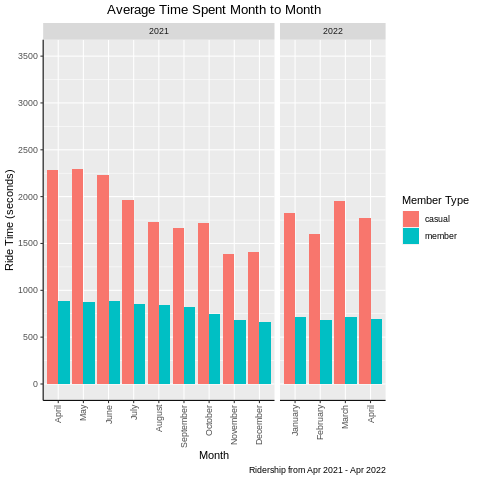

In [40]:
%%R
ggplot(monthly_ridership, aes(x = month,y = average_monthly_duration, 
                          fill = member_casual)) + 
  geom_col(position = "dodge") + facet_grid(~ year, scales = "free", 
                                            space = "free") +
  labs(title = "Average Time Spent Month to Month", x = "Month", 
       y = "Ride Time (seconds)", fill = "Member Type",
       caption = "Ridership from Apr 2021 - Apr 2022") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1), 
        axis.line = element_line(colour = 'black', size = 0.5, linetype = 'solid')) +
  scale_y_continuous(limits = c(0,3500), breaks = seq(0,3500,500))

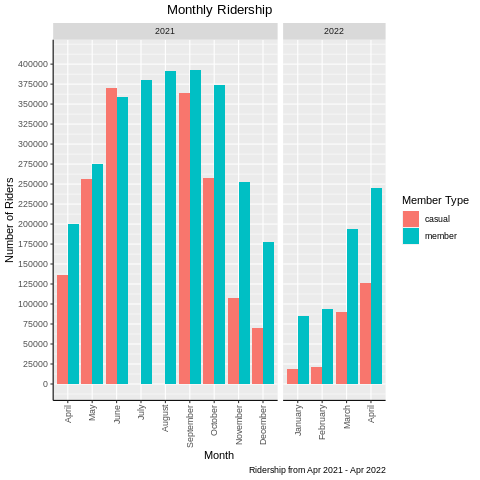

In [41]:
%%R
ggplot(monthly_ridership, aes(x = month, y = monthly_rides, fill = member_casual)) +
  geom_col(position = "dodge") + 
  facet_grid(~year, scales = "free", space = "free") +
  labs(title = "Monthly Ridership", x = "Month", 
      y = "Number of Riders", fill = "Member Type",
      caption = "Ridership from Apr 2021 - Apr 2022") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1), 
        axis.line = element_line(colour = 'black', size = 0.5, linetype = 'solid')) +
  scale_y_continuous(limits = c(0,410000), breaks = seq(0,410000,25000))

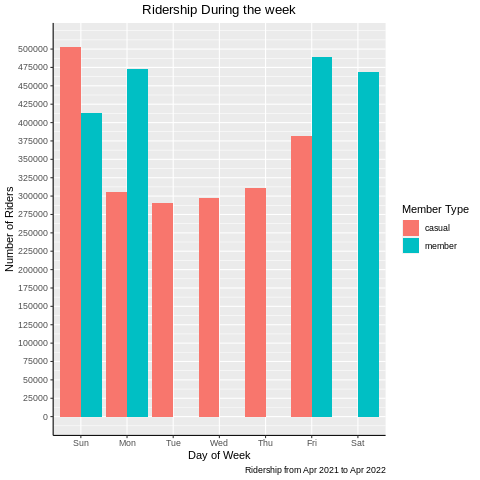

In [43]:
%%R
ggplot(ridership_data_by_membertype_and_weekday, 
       mapping = aes(x = weekday, y = number_of_ride, fill = member_casual)) +
  geom_col(position = "dodge") + 
  labs(title = "Ridership During the week", x = "Day of Week", 
       y = "Number of Riders", fill = "Member Type", 
       caption = "Ridership from Apr 2021 to Apr 2022") +
  theme(plot.title = element_text(hjust = 0.5), axis.line = 
          element_line(colour = 'black', size = 0.5, linetype = 'solid')) +
  scale_y_continuous(limits = c(0,510000), breaks = seq(0,510000,25000))

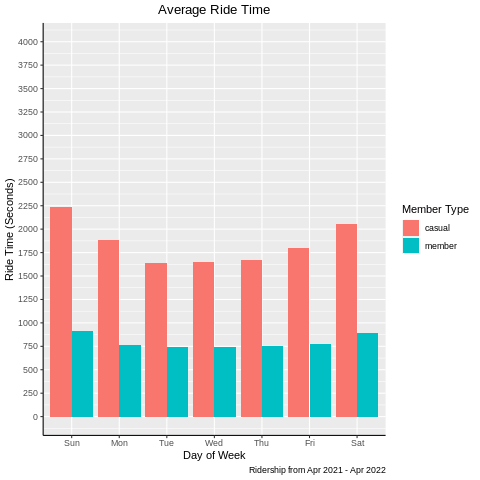

In [44]:
%%R
ggplot(ridership_data_by_membertype_and_weekday,
       aes(x = weekday, y = average_duration, fill = member_casual)) + 
  geom_col(position = "dodge") +
  labs(title = "Average Ride Time", x = "Day of Week", 
       y = "Ride Time (Seconds)", fill = "Member Type", 
       caption = "Ridership from Apr 2021 - Apr 2022") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.line = element_line(colour = 'black', 
                                 size = 0.5, linetype = 'solid')) +
  scale_y_continuous(limits = c(0,4000), breaks = seq(0,4000,250))

## Conclusion

In conclusion, according to the analysis, Cyclistic has a strong userbase that tend to use our bike sharing program. Our members follow a seasonal riding pattern due to cold winter months. However, although lower, the turn out is consistent over the winter months amongst our members, unlike our casual riders who tend to decrease from November to February.

This isn't a big surprise as Chicago has a seasonal tourism industry which tends to die down in late fall and winter and starts picking up in the spring. 

I would suggest that for our casual customers we have 2 set of rates during the year. From beginning of March to end of October we have one set of rates and from November to February we lower our rates to increase income during the winter months.

Casual riders tend to ride bikes 2.5 times longer than our members. Implemeting a higher cost per mintue at a lower time allotment for single tirps than our current pricing would incentivise casual riders that buy multiple single trip and or day trip passes over the course of a month. Currently our pricing for a single trip is:
3.30
/
30 minutes
+
0.15 per extra minute

We should lower either the time limit for the single trip to 20 minutes or increase the cost per minute so the casual riders see the benefit of getting a membership than paying for multiple single trips over a week/month

Having additional information like distance a bike is riden per trip would help make decisions more concrete. Knowing how and where the bikes are being riden the most during the year can help us allocate more bike stands in those areas

